In [2]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np
import ast, seaborn as sns
from adjustText import adjust_text
from datetime import datetime as dt
from matplotlib.ticker import FuncFormatter
from datasets import load_dataset


#setup
csv = pd.read_csv("/Users/isaacguediri/Desktop/data_jobs.csv")
csv["job_posted_date"] = pd.to_datetime(csv["job_posted_date"])
csv['job_skills'] = csv['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
csv_us = csv[(csv['job_country'] == 'United States') & (csv['job_title_short'] == 'Data Analyst')].copy()

In [4]:
csv_us.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67816 entries, 36 to 785705
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        67816 non-null  object        
 1   job_title              67816 non-null  object        
 2   job_location           67582 non-null  object        
 3   job_via                67809 non-null  object        
 4   job_schedule_type      67107 non-null  object        
 5   job_work_from_home     67816 non-null  bool          
 6   search_location        67816 non-null  object        
 7   job_posted_date        67816 non-null  datetime64[ns]
 8   job_no_degree_mention  67816 non-null  bool          
 9   job_health_insurance   67816 non-null  bool          
 10  job_country            67816 non-null  object        
 11  salary_rate            8442 non-null   object        
 12  salary_year_avg        4350 non-null   float64       
 13  sala

In [5]:
csv_us.sample(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
537672,Data Analyst,Data Analyst,"Columbia, SC",via BeBee,Full-time,False,Georgia,2023-10-14 20:07:26,True,False,United States,NaN,NaN,NaN,"BTS, LLC","[r, python, sql]","{'programming': ['r', 'python', 'sql']}"
436770,Data Analyst,Data Analyst-,"San Jose, CA",via BeBee,Full-time,False,"California, United States",2023-12-13 16:00:56,True,False,United States,NaN,NaN,NaN,WPP PLC,"[tableau, power bi, excel]","{'analyst_tools': ['tableau', 'power bi', 'exc..."
774314,Data Analyst,"Analyst, Monitoring & Analytics – Default Solu...","Lewisville, TX",via TIAA Careers,Full-time,False,"Texas, United States",2023-10-05 01:01:51,False,False,United States,NaN,NaN,NaN,TIAA,"[vba, sql, python, excel, sharepoint, tableau,...","{'analyst_tools': ['excel', 'sharepoint', 'tab..."
528903,Data Analyst,Data Analyst,"Concord, NH",via BeBee,Full-time,False,"New York, United States",2023-11-19 11:00:17,True,False,United States,NaN,NaN,NaN,Mindlance,[sql],{'programming': ['sql']}
475406,Data Analyst,Elections Data Analyst I,"Atlanta, GA",via BeBee,Full-time,False,Georgia,2023-08-26 15:00:27,False,False,United States,NaN,NaN,NaN,Team Georgia Careers,"[sql, r, python, mysql, oracle, linux, excel, ...","{'analyst_tools': ['excel', 'word', 'tableau',..."


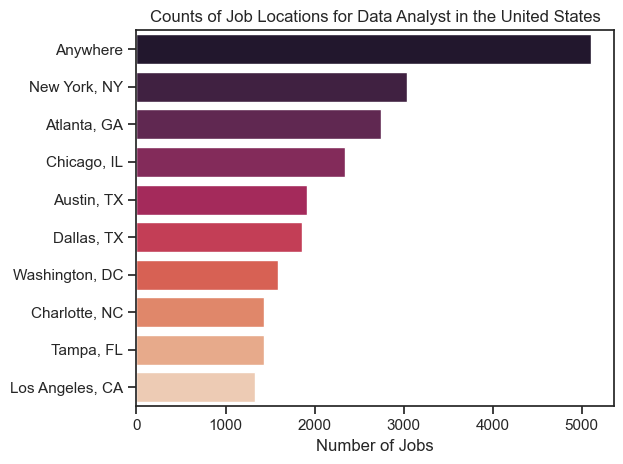

In [6]:
csv_plot = csv_us['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style="ticks")
sns.barplot(x='count', y='job_location', data=csv_plot, palette='rocket', hue='job_location')
plt.title('Counts of Job Locations for Data Analyst in the United States')
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.tight_layout()
plt.show()

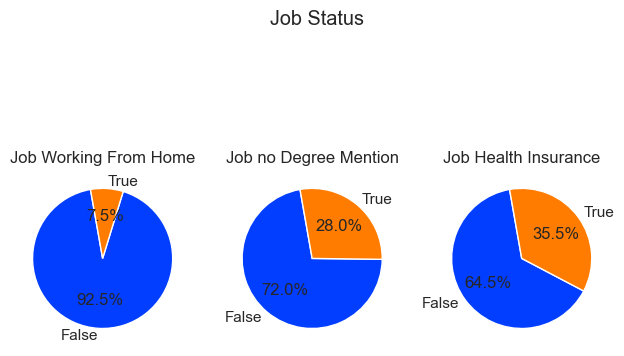

In [7]:
csv_plot = csv_us[['job_work_from_home', 'job_no_degree_mention', 'job_health_insurance']]
csv_plot_text = ['Job Working From Home', 'Job no Degree Mention', 'Job Health Insurance']
fig, ax = plt.subplots(1, 3)
job_statuses = csv_plot.columns.tolist()
for i, job_status in enumerate(job_statuses):
    pie = csv_plot[job_status].value_counts().plot(kind='pie', startangle=100, autopct='%1.1f%%', ax=ax[i], colors=sns.color_palette('bright'))
    pie.set_title(csv_plot_text[i])
    pie.set_ylabel("")
fig.suptitle("Job Status")
fig.tight_layout()

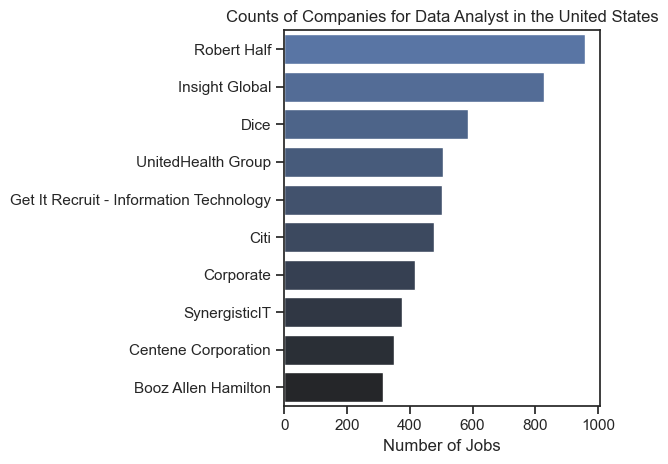

In [12]:
csv_plot = csv_us['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style="ticks")
sns.barplot(x='count', y='company_name', data=csv_plot, palette='dark:b_r', hue='company_name')
plt.title('Counts of Companies for Data Analyst in the United States')
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.tight_layout()
plt.show()